### Comparision of Models using only Cutting Parameters

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import warnings
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from numpy.random import seed
import os
import random as rn

In [77]:
warnings.filterwarnings("ignore")

#### Down Milling

**Random Forest**

In [78]:
up_or_down = 'down' # or down
all_data = pd.read_csv('../../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
all_data = all_data.drop(index=[48, 49, 51, 72, 91], axis=0).reset_index(drop=True)  # remove outliers
all_data.head()

Nr.  spindle_speed   ap     fz   Ra_down   vbs   clamp_t1     clamp_t2  \
0    1           8000  0.2  0.050  12.83250   800  23.664093   917.580527   
1    2           8000  0.2  0.065   6.47625  1040  28.025455  1817.287671   
2    3           8000  0.2  0.075   8.42100  1200  24.258964  2600.600669   
3    4           8000  0.2  0.100   6.81600  1600  23.584906  4141.970983   
4    5           8000  0.4  0.050  12.51250   800  43.182927  1232.354156   

    clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  robot_t8  \
0  38.393060     131.0  ...    1159.0     340.0 -0.164626  3.279446  1.164723   
1  50.951992     153.0  ...    1114.0     286.0 -0.152276  2.869851  1.125636   
2  56.380290     175.0  ...    1205.0     350.0  0.195294  2.681590  1.214723   
3  68.429443     212.0  ...    1206.0     438.0 -0.022681  2.818957  1.221912   
4  55.606742     132.0  ...    1147.0     275.0  0.136498  2.464138  1.154345   

   robot_t9   clamp_f1   clamp_f2   robot_f1   robot_f2  
0  1.162811  12.222404  19.191919  22.863227  14.646465  
1  1.123908  17.382572  21.717172  25.495338  31.313131  
2  1.212308  20.770490  21.717172  37.602301  31.313131  
3  1.217963  27.491432  21.717172  39.944840   5.050505  
4  1.152213  18.159337   9.595960  33.502295   6.060606  

[5 rows x 28 columns]

##### All Features without Hyperparametertuning

In [79]:
used_feature = ['spindle_speed', 'ap', 'fz', 'vbs',]

In [80]:
X = all_data[used_feature]
X = np.array(X)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=20, shuffle=True)

In [81]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train);

In [82]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [83]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.08
Coefficient of determination: 0.98
MAE:0.21
mean absolute percentage error:0.03


**Testing Metrics**

In [84]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.28
Coefficient of determination: 0.96
MAE:0.36
mean absolute percentage error:0.05


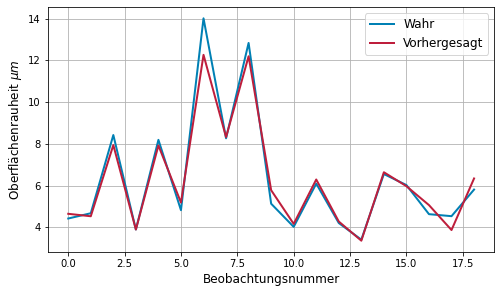

In [89]:
plt.figure(figsize=(16/2, 9/2))
plt.plot(y_test, label='Wahr', color=(0/255, 128/255, 180/255), lw=2)
plt.plot(y_pred, label='Vorhergesagt', color=(190/255, 30/255, 60/255), lw=2)
plt.grid()
plt.xlabel('Beobachtungsnummer', fontsize=12)
plt.ylabel(r'Oberflächenrauheit $\mu m$', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('../../images/cutting_model.svg')

In [86]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [87]:
feature_names = ['Schnitttiefe', 'Spindeldrehzahl', 'Vorschub pro Zahn', 'Vorschubgeschwindigkeit']

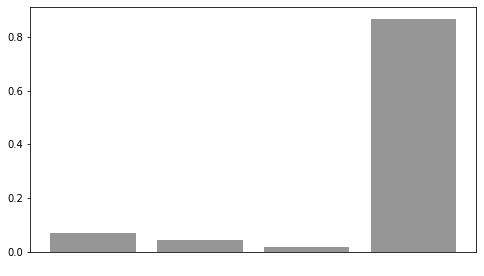

In [91]:
fig, ax = plt.subplots(figsize=(16/2, 9/2))
ax.bar(feature_names, importances, color=(150/255, 150/255, 150/255))
ax.tick_params(axis='x', colors='white')
plt.savefig('../../images/Feature-Importance.svg')

**Gradient Boosting Regressor**

##### All Features without Hyperparametertuning

In [10]:
used_feature = ['spindle_speed', 'ap', 'fz', 'vbs',]

In [11]:
X = all_data[used_feature]
X = np.array(X)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=20, shuffle=True)

In [12]:
gbr = GradientBoostingRegressor(random_state=20,)

In [13]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=20)

In [14]:
y_fit = gbr.predict(x_train)
y_pred = gbr.predict(x_test)

**Training Metrics**

In [15]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.09
Coefficient of determination: 0.98
MAE:0.24
mean absolute percentage error:0.04


**Testing Metrics**

In [16]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.35
Coefficient of determination: 0.96
MAE:0.41
mean absolute percentage error:0.06


**Decision Tree**

In [17]:
X = all_data[used_feature]
X = np.array(X)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=20, shuffle=True)

In [18]:
dt = DecisionTreeRegressor(random_state=20)

In [19]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=20)

In [20]:
y_pred = dt.predict(x_test)
y_fit = dt.predict(x_train)

**Training Metrics**

In [21]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.00
Coefficient of determination: 1.00
MAE:0.00
mean absolute percentage error:0.00


**Testing Metrics**

In [22]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.26
Coefficient of determination: 0.97
MAE:0.45
mean absolute percentage error:0.08


**ANN**

In [23]:
def get_mlp_model(hiddenLayerOne=64, hiddenLayerTwo=32, hiddenLayerThree=16,
    dropout=0.2, learnRate=0.01, input_dim=4):

    
    # Initialising the ANN
    model = Sequential()

    # Adding the input layer and the first hidden layer
    model.add(Dense(hiddenLayerOne, activation = 'relu', input_dim=input_dim))
    
    model.add(Dropout(dropout))
       
    # Adding the second hidden layer
    model.add(Dense(hiddenLayerTwo, activation='relu'))

    model.add(Dropout(dropout))

    # Adding the third hidden layer
    model.add(Dense(hiddenLayerThree, activation='relu'))

    # Adding the output layer
    model.add(Dense(units=1))

    #model.add(Dense(1))
    # Compiling the ANN
    model.compile(optimizer=Adam(learning_rate=learnRate), loss='mean_squared_error',)
    
    return model

In [24]:
s = StandardScaler()

In [25]:
X_train = s.fit_transform(x_train)
X_test = s.transform(x_test)

In [26]:
# Fitting the ANN to the Training set
SEED = 20
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
rn.seed(SEED)
model = get_mlp_model()
model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0)

2022-01-15 12:02:50.296949: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-15 12:02:50.297353: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-15 12:02:50.297505: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (2009f4ceb3c5): /proc/driver/nvidia/version does not exist
2022-01-15 12:02:50.303232: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
y_fit = model.predict(X_train)
y_pred = model.predict(X_test)

**Training Metrics**

In [28]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.82
Coefficient of determination: 0.82
MAE:0.64
mean absolute percentage error:0.10


**Testing Metrics**

In [29]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 1.98
Coefficient of determination: 0.76
MAE:1.06
mean absolute percentage error:0.16


**LightGBM**

In [23]:
max_depth = np.linspace(5, 500, 12)
max_depth = np.append(max_depth, -1)
max_depth = max_depth.astype(int)
num_leaves = np.arange(11, 56, 5)
min_data_in_leaf = [1, 2, 3, 4]

param_distribution = {'max_depth': max_depth, 'num_leaves': num_leaves, 'min_data_in_leaf': min_data_in_leaf}

In [24]:
lgbm = LGBMRegressor(random_state=20)
lgbm_random = RandomizedSearchCV(lgbm, param_distributions=param_distribution, n_iter=100, 
                               scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=20)

In [25]:
lgbm_random.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=20), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([  5,  50,  95, 140, 185, 230, 275, 320, 365, 410, 455, 500,  -1]),
                                        'min_data_in_leaf': [1, 2, 3, 4],
                                        'num_leaves': array([11, 16, 21, 26, 31, 36, 41, 46, 51])},
                   random_state=20, scoring='neg_mean_absolute_error')

In [26]:
lgbm_random.best_params_

{'num_leaves': 41, 'min_data_in_leaf': 3, 'max_depth': 500}

In [27]:
lgbm = LGBMRegressor(num_leaves=41, min_data_in_leaf=3, max_depth=500, random_state=20)

lgbm.fit(x_train, y_train,)

LGBMRegressor(max_depth=500, min_data_in_leaf=3, num_leaves=41, random_state=20)

In [28]:
# predict test data
y_pred = lgbm.predict(x_test)

# fit train data
y_fit = lgbm.predict(x_train)

**Training Metrics**

In [29]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.01
Coefficient of determination: 1.00
MAE:0.08
mean absolute percentage error:0.01


**Testing Metrics**

In [30]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.46
Coefficient of determination: 0.94
MAE:0.47
mean absolute percentage error:0.08
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=4, min_chi

**Linear Regression**

In [34]:
X = all_data[used_feature]
Y = all_data['Ra_{}'.format(up_or_down)]

In [35]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [36]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [37]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

**Training Metrics**

In [38]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 1.28
Coefficient of determination: 0.71
MAE:0.84
mean absolute percentage error:0.14


**Testing Metrics**

In [39]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 2.14
Coefficient of determination: 0.74
MAE:1.09
mean absolute percentage error:0.17


**Lasso**

In [40]:
X = all_data[used_feature]
Y = all_data['Ra_{}'.format(up_or_down)]

In [41]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [42]:
las = Lasso(alpha=0.01)
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("lasso", las)])

In [43]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

**Training Metrics**

In [44]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 1.30
Coefficient of determination: 0.71
MAE:0.85
mean absolute percentage error:0.14


**Testing Metrics**

In [45]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 2.34
Coefficient of determination: 0.71
MAE:1.09
mean absolute percentage error:0.17


**Ridge**

In [46]:
X = all_data[used_feature]
Y = all_data['Ra_{}'.format(up_or_down)]

In [47]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [48]:
rid = Ridge(alpha=0.01)
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("ridge", rid)])

In [49]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

**Training Metrics**

In [50]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 1.28
Coefficient of determination: 0.71
MAE:0.84
mean absolute percentage error:0.14


**Testing Metrics**

In [51]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 2.14
Coefficient of determination: 0.74
MAE:1.09
mean absolute percentage error:0.17


**Elastic Net**

In [52]:
X = all_data[used_feature]
Y = all_data['Ra_{}'.format(up_or_down)]

In [53]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [54]:
en = ElasticNet(alpha=0.01)
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("elastic_net", en)])

In [55]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

**Training Metrics**

In [56]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 1.30
Coefficient of determination: 0.71
MAE:0.85
mean absolute percentage error:0.14


**Testing Metrics**

In [57]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 2.34
Coefficient of determination: 0.71
MAE:1.09
mean absolute percentage error:0.17


**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

**##########################################################################################**

#### Up Milling

**Random Forest**

In [58]:
up_or_down = 'up' # or down
all_data = pd.read_csv('../../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
all_data = all_data.drop(index=[48, 49, 51, 72, 91], axis=0).reset_index(drop=True)  # remove outliers
all_data.head()

Nr.  spindle_speed   ap     fz     Ra_up   vbs   clamp_t1     clamp_t2  \
0    1           8000  0.2  0.050  12.90500   800  26.229323  1295.769854   
1    2           8000  0.2  0.065   6.78175  1040  29.329545   994.685664   
2    3           8000  0.2  0.075   8.43450  1200  22.787313  1504.542610   
3    4           8000  0.2  0.100   6.77025  1600  28.397163  2118.802554   
4    5           8000  0.4  0.050  12.54250   800  43.666667   824.102151   

    clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  robot_t8  \
0  44.484558     155.0  ...    1210.0     384.0  0.295203  2.858728  1.223420   
1  43.024878     128.0  ...    1221.0     454.0  0.129026  2.502421  1.249903   
2  44.924273     151.0  ...    1246.0     474.0  0.202293  2.518253  1.249318   
3  54.015627     169.0  ...    1278.0     614.0  0.179430  2.414027  1.287632   
4  52.226146     126.0  ...    1128.0     311.0  0.169912  3.404943  1.141053   

   robot_t9   clamp_f1   clamp_f2   robot_f1  robot_f2  
0  1.219488  17.582900  21.717172  51.978762  5.050505  
1  1.244343  15.763967  21.717172  45.485476  4.545455  
2  1.243240  20.080109  21.717172  63.985078  5.050505  
3  1.278015  20.092329  21.717172  84.466924  5.050505  
4  1.139565  13.043699   9.595960  32.618295  6.060606  

[5 rows x 28 columns]

##### All Features without Hyperparametertuning

In [59]:
used_feature = ['spindle_speed', 'ap', 'fz', 'vbs',]

In [60]:
X = all_data[used_feature]
X = np.array(X)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=20, shuffle=True)

In [61]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train);

In [62]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [63]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.07
Coefficient of determination: 0.98
MAE:0.20
mean absolute percentage error:0.03


**Testing Metrics**

In [64]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.72
Coefficient of determination: 0.91
MAE:0.70
mean absolute percentage error:0.12


**Gradient Boosting Regressor**

##### All Features without Hyperparametertuning

In [65]:
used_feature = ['spindle_speed', 'ap', 'fz', 'vbs',]

In [66]:
X = all_data[used_feature]
X = np.array(X)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=20, shuffle=True)

In [67]:
gbr = GradientBoostingRegressor(random_state=20,)

In [68]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=20)

In [69]:
y_fit = gbr.predict(x_train)
y_pred = gbr.predict(x_test)

**Training Metrics**

In [70]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.08
Coefficient of determination: 0.98
MAE:0.20
mean absolute percentage error:0.03


**Testing Metrics**

In [71]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.78
Coefficient of determination: 0.91
MAE:0.66
mean absolute percentage error:0.11


**Decision Tree**

In [72]:
X = all_data[used_feature]
X = np.array(X)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=20, shuffle=True)

In [73]:
dt = DecisionTreeRegressor(random_state=20)

In [74]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=20)

In [75]:
y_pred = dt.predict(x_test)
y_fit = dt.predict(x_train)

**Training Metrics**

In [76]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.00
Coefficient of determination: 1.00
MAE:0.00
mean absolute percentage error:0.00


**Testing Metrics**

In [77]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.59
Coefficient of determination: 0.93
MAE:0.62
mean absolute percentage error:0.11


**ANN**

In [78]:
def get_mlp_model(hiddenLayerOne=64, hiddenLayerTwo=32, hiddenLayerThree=16,
    dropout=0.2, learnRate=0.01, input_dim=4):

    
    # Initialising the ANN
    model = Sequential()

    # Adding the input layer and the first hidden layer
    model.add(Dense(hiddenLayerOne, activation = 'relu', input_dim=input_dim))
    
    model.add(Dropout(dropout))
       
    # Adding the second hidden layer
    model.add(Dense(hiddenLayerTwo, activation='relu'))

    model.add(Dropout(dropout))

    # Adding the third hidden layer
    model.add(Dense(hiddenLayerThree, activation='relu'))

    # Adding the output layer
    model.add(Dense(units=1))

    #model.add(Dense(1))
    # Compiling the ANN
    model.compile(optimizer=Adam(learning_rate=learnRate), loss='mean_squared_error',)
    
    return model

In [79]:
s = StandardScaler()

In [80]:
X_train = s.fit_transform(x_train)
X_test = s.transform(x_test)

In [81]:
# Fitting the ANN to the Training set
SEED = 20
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
rn.seed(SEED)
tf.random.set_seed(20)
model = get_mlp_model()
model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0)

In [82]:
y_fit = model.predict(X_train)
y_pred = model.predict(X_test)

**Training Metrics**

In [83]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.87
Coefficient of determination: 0.79
MAE:0.68
mean absolute percentage error:0.09


**Testing Metrics**

In [84]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 2.47
Coefficient of determination: 0.70
MAE:1.09
mean absolute percentage error:0.15


**LightGBM**

In [85]:
lgbm = LGBMRegressor(random_state=20)

lgbm.fit(x_train, y_train,)
        #eval_set=[(x_test, y_test)],
        #eval_metric='rmse',)
        #early_stopping_rounds=30))

LGBMRegressor(random_state=20)

In [86]:
# predict test data
y_pred = lgbm.predict(x_test)

# fit train data
y_fit = lgbm.predict(x_train)

**Training Metrics**

In [87]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 1.00
Coefficient of determination: 0.76
MAE:0.70
mean absolute percentage error:0.11


**Testing Metrics**

In [88]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 3.22
Coefficient of determination: 0.61
MAE:1.10
mean absolute percentage error:0.15


**Linear Regression**

In [89]:
X = all_data[used_feature]
Y = all_data['Ra_{}'.format(up_or_down)]

In [90]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [91]:
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("linear_regression", lr)])

In [92]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

**Training Metrics**

In [93]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 1.08
Coefficient of determination: 0.75
MAE:0.83
mean absolute percentage error:0.13


**Testing Metrics**

In [94]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 2.16
Coefficient of determination: 0.74
MAE:1.17
mean absolute percentage error:0.19


**Lasso**

In [95]:
X = all_data[used_feature]
Y = all_data['Ra_{}'.format(up_or_down)]

In [96]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [97]:
las = Lasso(alpha=0.01)
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("lasso", las)])

In [98]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

**Training Metrics**

In [99]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 1.08
Coefficient of determination: 0.74
MAE:0.84
mean absolute percentage error:0.14


**Testing Metrics**

In [100]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 2.36
Coefficient of determination: 0.72
MAE:1.24
mean absolute percentage error:0.20


**Ridge**

In [101]:
X = all_data[used_feature]
Y = all_data['Ra_{}'.format(up_or_down)]

In [102]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [103]:
rid = Ridge(alpha=0.01)
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("ridge", rid)])

In [104]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

**Training Metrics**

In [105]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 1.08
Coefficient of determination: 0.75
MAE:0.83
mean absolute percentage error:0.13


**Testing Metrics**

In [106]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 2.16
Coefficient of determination: 0.74
MAE:1.17
mean absolute percentage error:0.19


**Elastic Net**

In [107]:
X = all_data[used_feature]
Y = all_data['Ra_{}'.format(up_or_down)]

In [108]:
x_train, x_test , y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)

In [109]:
en = ElasticNet(alpha=0.01)
s = StandardScaler()
estimator = Pipeline([
        ("scaler", s),
        ("elastic_net", en)])

In [110]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
y_fit = estimator.predict(x_train)

**Training Metrics**

In [111]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 1.08
Coefficient of determination: 0.74
MAE:0.84
mean absolute percentage error:0.14


**Testing Metrics**

In [112]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 2.36
Coefficient of determination: 0.72
MAE:1.25
mean absolute percentage error:0.20
